# Mask Usage & Public Sentiment Analysis
This Jupyter Notebook contains data analysis and visualization related to **mask usage trends and public sentiment** during COVID-19.

We will:
- Install necessary libraries
- Load and clean data
- Perform sentiment analysis
- Visualize trends

##  Installing Required Libraries
We need to install the required Python libraries for data analysis, machine learning, and Twitter scraping.


In [372]:
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install tweepy

##  Fixing `snscrape` Issues
Since `snscrape` is used for scraping Twitter without API authentication, we need to uninstall any corrupted versions and reinstall it.


In [374]:
!pip uninstall snscrape -y
!pip install snscrape

Found existing installation: snscrape 0.7.0.20230622
Uninstalling snscrape-0.7.0.20230622:
  Successfully uninstalled snscrape-0.7.0.20230622
  Using cached snscrape-0.7.0.20230622-py3-none-any.whl.metadata (4.9 kB)
Using cached snscrape-0.7.0.20230622-py3-none-any.whl (74 kB)


##  Importing Required Libraries
Once the libraries are installed, we import them for use in the notebook.


In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from wordcloud import WordCloud

##  Loading the Dataset
We load the CSV file that contains public sentiment data about mask usage during COVID-19.


In [349]:
df = pd.read_csv('mask_usage_reactions.csv')
df.head()

,Year,Comment,Sentiment,Usage_Rate_Percentage
0,2019,"Masks are mostly used in hospitals, not daily ...",Neutral,5
1,2019,Only a few people wear masks for pollution.,Neutral,5
2,2019,Wearing masks daily is uncommon.,Neutral,5
3,2019,"I see some people wearing masks, but not many.",Neutral,7
4,2019,Most people don't wear masks unless sick.,Neutral,8


##  Data Cleaning
Let's check for missing values and clean the dataset if needed.


In [352]:
df.isnull().sum()

Year                     0
Comment                  0
Sentiment                0
Usage_Rate_Percentage    0
dtype: int64

##  Mask Usage Trend Over the Years
We visualize the trend of mask usage percentages over the years (2019-2022).


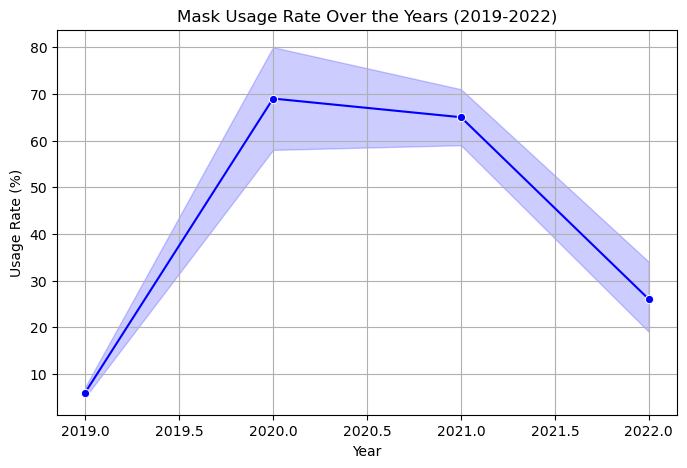

In [355]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df['Year'], y=df['Usage_Rate_Percentage'], marker='o', linestyle='-', color='b')
plt.title('Mask Usage Rate Over the Years (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Usage Rate (%)')
plt.grid(True)
plt.show()

##  Mask Usage by Country
We analyze the mask usage in public places across different countries.


In [357]:
import pandas as pd

file_path = '/Users/almoh/Downloads/covid&Twitter.csv'
timeline = pd.read_csv(file_path)
print(timeline.head())
print(timeline.columns)

                                                                           Category: All categories
Country        using mask: (4/1/19 - 1/18/25) COVID-19: (4/1/19 - 1/18/25)    X: (4/1/19 - 1/18/25)
Bhutan         NaN                            NaN                                               NaN
American Samoa NaN                            NaN                                               NaN
Brunei         <1%                            45%                                               55%
Philippines    <1%                            49%                                               51%
Index(['Category: All categories'], dtype='object')


C:\Users\almoh\AppData\Local\Temp\ipykernel_14684\3673100973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Mask Usage (%)", data=df_filtered, palette="Blues_r")


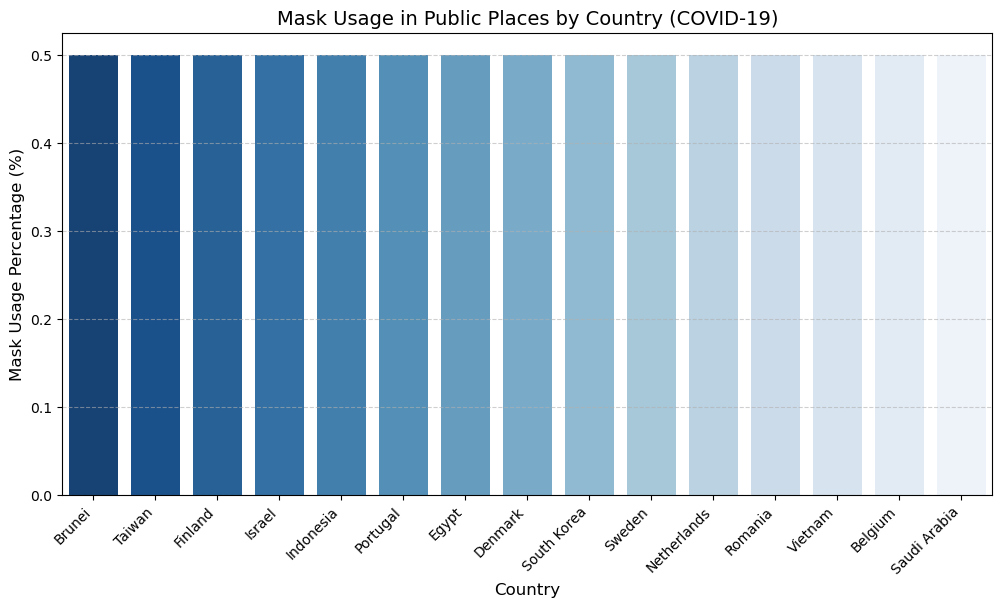

In [358]:
# Plot the corrected bar graph with X as Country and Y as Percentage
plt.figure(figsize=(12, 6))

# Create the bar plot using Seaborn
sns.barplot(x="Country", y="Mask Usage (%)", data=df_filtered, palette="Blues_r")

# Add title and labels
plt.title("Mask Usage in Public Places by Country (COVID-19)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Mask Usage Percentage (%)", fontsize=12)

# Rotate country names for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Add a grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()


##  Sentiment Analysis of Public Reactions
We visualize the public sentiment regarding mask usage over the years.


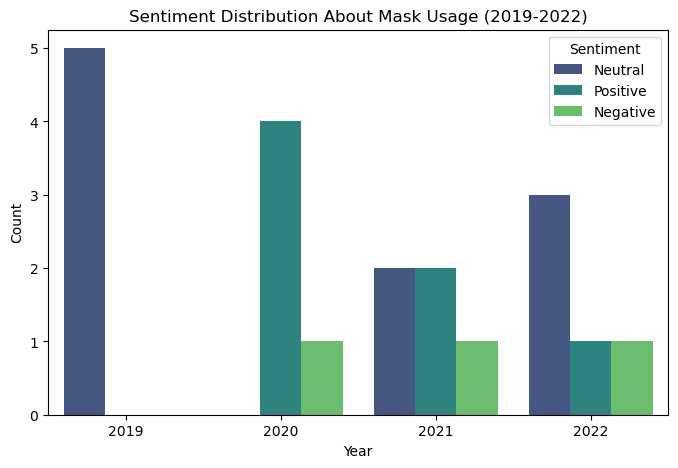

In [360]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Year', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution About Mask Usage (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

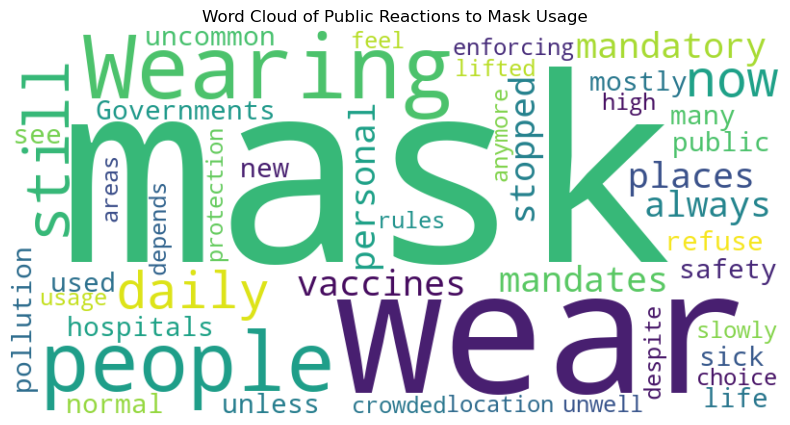

In [361]:
text = " ".join(comment for comment in df.Comment)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Public Reactions to Mask Usage")
plt.show()